In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from config import *
from window import *
from pyfield import *
import AIA
import Sun

In [2]:
npz = np.load('Q:\\data\\20110225\\sdo.x766y1118.20110225.npz')
data = npz['hmi'][129,:,:].astype(np.float32)

nz = 64
field = Field(data, nz)

In [3]:
X = []
I = []
L = []

l0 = 10.
alpha = 0.
N = int(1e3)
step = 0.5

R = np.ones((3,N))*2
R[0:2,:] = np.random.random((2,N))*63

flines = field.Fline(R, step = 0.5)

In [4]:
def hydro_static(p,s):
    alpha = 4./11
    lam = 1.9e-22
    A = ((p/(2*Sun.k_b))**2*lam/Sun.kappa/(3.5*alpha**2-alpha))**(2./11)
    
    return A*s**alpha  

def hydro_evap(j,s):
    return (25./2*Sun.k_b/Sun.kappa*j*s)**(2./5)


for i in range(0,int(N)):

    fline = flines[i]
    if (len(fline.shape) != 1):
        x = np.zeros((fline.shape[1],4), dtype = np.float32)
        x[:,0] = fline[0,:]-32
        x[:,1] = fline[1,:]-32
        x[:,2] = fline[2,:]
        x[:,3] = 1.
               
        nl = x.shape[0]
        l = step*nl
        

        if (fline[2,0] < step) and (fline[2,-1] < step):
        
            s = (0.5*(nl-1)-np.abs(np.arange(0,nl).astype(np.float32)-0.5*(nl-1))+0.5)*4.2e7*step
            p = 2*1e9*Sun.k_b*1e6*(l/l0)**alpha
            T = hydro_static(p,s)
        
            X = X + [x]
            I = I + [(p/(2*Sun.k_b*T))**2*AIA.t171(T)*2e7/256.]

        
        if ((fline[2,0] < step) and (fline[2,-1] > step)) or ((fline[2,0] > step) and (fline[2,-1] < step)):
            s = np.arange(0,nl)+0.5 if fline[2,0] < fline[2,-1] else nl-np.arange(0,nl)-0.5
            s*= 4.2e7*step
            
            p = 2*1e9*Sun.k_b*1e6
            j = 1e9*1e4
            T = hydro_evap(j,s)
            
            X = X + [x]
            I = I + [(p/(2*Sun.k_b*T))**2*AIA.t171(T)*2e7/256.]
            #I = I + [1.]

  
        #plt.plot(fline[1,:],fline[0,:], color = 'green')

In [ ]:
win = window(X,I)

In [4]:
img = np.sum(npz['aia_171'][100:130,:,:].astype(np.float32),axis=0)

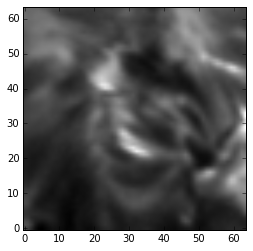

In [8]:
plt.imshow(img, 'gray', origin = 'lower')

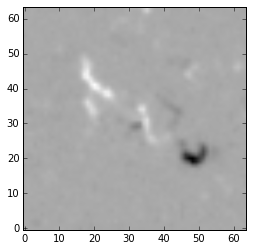

In [9]:
plt.imshow(data, 'gray', origin = 'lower')

In [15]:
?plt.imshow

In [28]:
a = np.ones((3,4,4))
b = np.ones((4,4))
c = a - b

In [5]:
?np.row_stack

In [4]:
[1] + [2]

[1, 2]

In [5]:
True * False

0